# RF and Friends

This notebook serves as a demo of my implementation of Breiman's Random Forest's as well as some simplified variants that are relevant in the literature. 

Relevant Papers:

[1] G ́erard Biau and Erwan Scornet. “A random forest guided tour”. In: TEST 25.2 (June 2016), pp. 197–227. issn: 1863-8260. doi: 10.1007/s11749-016-0481-7. url: https://doi.org/ 10.1007/s11749-016-0481-7.

[2] Leo Breiman. “Random Forests”. In: Machine Learning 45.1 (Oct. 2001), pp. 5–32. issn: 1573- 0565. doi: 10.1023/A:1010933404324. url: https://doi.org/10.1023/A:1010933404324.

[3] Baptiste Gregorutti, Bertrand Michel, and Philippe Saint-Pierre. “Correlation and variable importance in random forests”. In: Statistics and Computing 27.3 (2017), pp. 659–678. doi: 10.1007/s11222-016-9646-1. url: https://doi.org/10.1007/s11222-016-9646-1.

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as SklearnRF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from randomforest import CustomRandomForestRegressor as CustomRF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

## Comparison to Scikit-Learn

First things first, compare accuracy and training time to sklearn's well establsihed implementation. Accuracy should be on par (but I dont expect exact because inherent randomness) but training time will be significantly greater than scikit implementation as I haven't done much in the way of optimization other than parallelize the fitting of the trees.

In [2]:
# Load Titanic dataset
df = pd.read_csv("titanic/train.csv")

# Keep only relevant columns
cols_to_keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp']
df = df[cols_to_keep]

# Encode categorical columns (e.g., 'Sex')
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Drop rows with missing values
df.dropna(inplace=True)

# Define target and features
target = 'Age'
X = df.drop(target, axis=1)
y = df[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
num_trees = 1000
max_depth = 100

# Scikit-learn RandomForest
sklearn_model = SklearnRF(
    n_estimators=num_trees,
    max_depth=max_depth,
    n_jobs=-1,
    random_state=42
)
start_time = time.time()
sklearn_model.fit(X_train, y_train)
sklearn_runtime = time.time() - start_time
y_pred_sklearn = sklearn_model.predict(X_test)

# Compute RMSE
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
nrmse_sklearn = rmse_sklearn / (y_test.max() - y_test.min())


# # Feature Importances 
# # mean decrease impurity
# mdi_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'MDI Importance': sklearn_model.feature_importances_
# }).sort_values(by='MDI Importance', ascending=False)

# # mean decrease accuracy 
# perm_importance = permutation_importance(
#     sklearn_model, X_test, y_test, n_repeats=10, random_state=42
# )
# mda_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'MDA Importance': perm_importance.importances_mean,
#     'Std Dev': perm_importance.importances_std
# }).sort_values(by='MDA Importance', ascending=False)

In [4]:
# Custom RandomForest

custom_model = CustomRF(n_trees=num_trees, max_depth=max_depth)

start_time = time.time()
custom_model.fit(X_train.to_numpy(), y_train.to_numpy())
custom_runtime = time.time() - start_time

y_pred_custom = custom_model.predict(X_test.to_numpy())

# Compute RMSE
rmse_custom = np.sqrt(mean_squared_error(y_test, y_pred_custom))
nrmse_custom = rmse_custom / (y_test.max() - y_test.min())

# # MDI
# mdi_importances_custom = custom_model.feature_importances_mdi()
# mdi_importances_custom_df = pd.DataFrame({
#     'Feature': [X.columns[feat] for feat in mdi_importances_custom.keys()],
#     'MDI Importance': list(mdi_importances_custom.values())
# }).sort_values(by='MDI Importance', ascending=False)

# # MDA
# mda_importances_custom = custom_model.feature_importances_mda()
# mda_importances_custom_df = pd.DataFrame({
#     'Feature': [X.columns[feat] for feat in mda_importances_custom.keys()],
#     'MDA Importance': list(mda_importances_custom.values())
# }).sort_values(by='MDA Importance', ascending=False)


Initializing RandomForestRegressor with forest_mode=classic


--- scikit-learn RandomForest ---
RMSE (Age): 12.286
NRMSE (Age): 0.201
Runtime: 0.519 seconds

--- Custom RandomForest ---
RMSE (Age): 12.299
NRMSE (Age): 0.202
Runtime: 5.555 seconds

--- Runtime Comparison ---
Number of Trees: 1000
Max Depth: 100
scikit-learn Runtime: 0.519 seconds
Custom RandomForest Runtime: 5.555 seconds


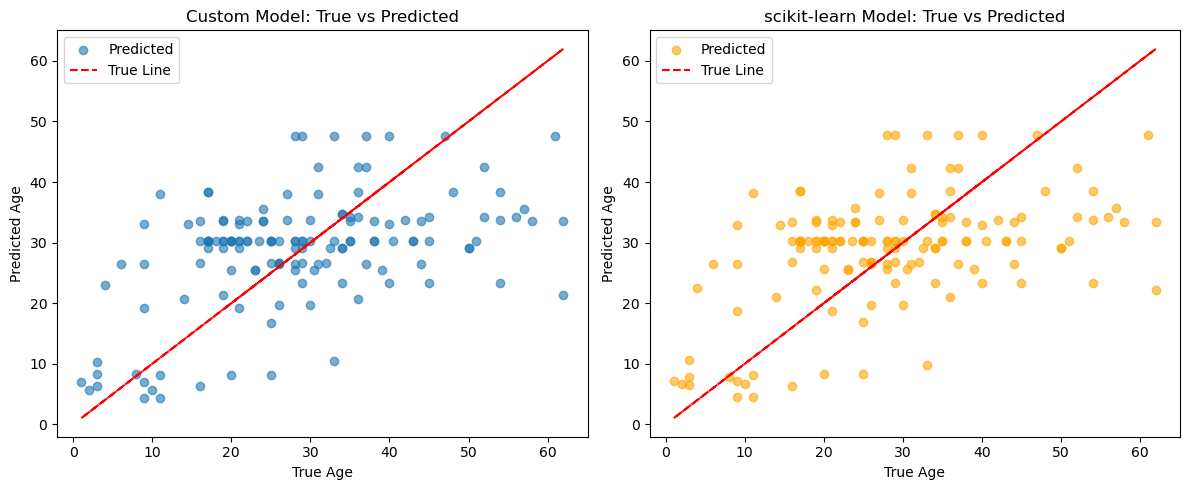

In [5]:
print("--- scikit-learn RandomForest ---")
print(f"RMSE (Age): {rmse_sklearn:.3f}")
print(f"NRMSE (Age): {nrmse_sklearn:.3f}")
print(f"Runtime: {sklearn_runtime:.3f} seconds")


print("\n--- Custom RandomForest ---")
print(f"RMSE (Age): {rmse_custom:.3f}")
print(f"NRMSE (Age): {nrmse_custom:.3f}")
print(f"Runtime: {custom_runtime:.3f} seconds")

# print("\n--- MDI Feature Importances (scikit-learn) ---")
# print(mdi_importance)
# print("\n--- MDI Feature Importances (Custom RandomForest) ---")
# print(mdi_importances_custom_df)

# print("\n--- MDA Feature Importances (scikit-learn) ---")
# print(mda_importance)
# print("\n--- MDA Feature Importances (Custom RandomForest) ---")
# print(mda_importances_custom_df)

# Runtime Comparison
print("\n--- Runtime Comparison ---")
print(f"Number of Trees: {num_trees}")
print(f"Max Depth: {max_depth}")
print(f"scikit-learn Runtime: {sklearn_runtime:.3f} seconds")
print(f"Custom RandomForest Runtime: {custom_runtime:.3f} seconds")

# Visualization
plt.figure(figsize=(12, 5))

# Custom Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_custom, alpha=0.6, label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='True Line')
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("Custom Model: True vs Predicted")
plt.legend()

# Scikit-learn Model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.6, color='orange', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='True Line')
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("scikit-learn Model: True vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()


We see our implementation yields similar level of accuracy but is significantly slower to train. This is expected as we did nothing for optimization but parallelize the fitting of the trees. 



Now let's do a quick look at the difference between some of the simplified variants. 

## What are the variants?:

### 1. Classic Random Forest

-At each split, select a feature and threshold that minimizes the variance (impurity) in the target variable for the resulting child nodes.

-Can optionally select a random subset of features for each split to introduce further randomness.

### 2. Purely Random Forest

-Randomly selects a feature at each split, but randomly select the threshold to split on (if categorical choose a random subset of categories)


## 3. Totally Random Forest

-Randomly selects both a feature and a threshold without considering the data distribution or variance.

-Entirely ignores impurity reduction, relying solely on randomization for diversity among trees.

## Why is this relevant?

The data-dependence of classic RFs complicates theoretical analysis, i.e.
understanding consistency, bias, and variance is challenging due to the adaptive nature of split selection.

It wasn't until Biau and Scornet (2016), proved the consistency of RFs under certain assumptions. 

Purely Random Forests and Totally Random Forests are easier to analyze because
they lack data-dependent splits, removing the need to account for impurity calculations.



--- Evaluating Mode: classic, Trees: 10, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=classic

--- Evaluating Mode: classic, Trees: 50, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=classic

--- Evaluating Mode: classic, Trees: 100, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=classic

--- Evaluating Mode: classic, Trees: 200, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=classic

--- Evaluating Mode: pure_random, Trees: 10, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=pure_random

--- Evaluating Mode: pure_random, Trees: 50, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=pure_random

--- Evaluating Mode: pure_random, Trees: 100, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=pure_random

--- Evaluating Mode: pure_random, Trees: 200, Depth: 10 ---
Initializing RandomForestRegressor with forest_mode=pure_random

--- Evaluating Mode: totally_random

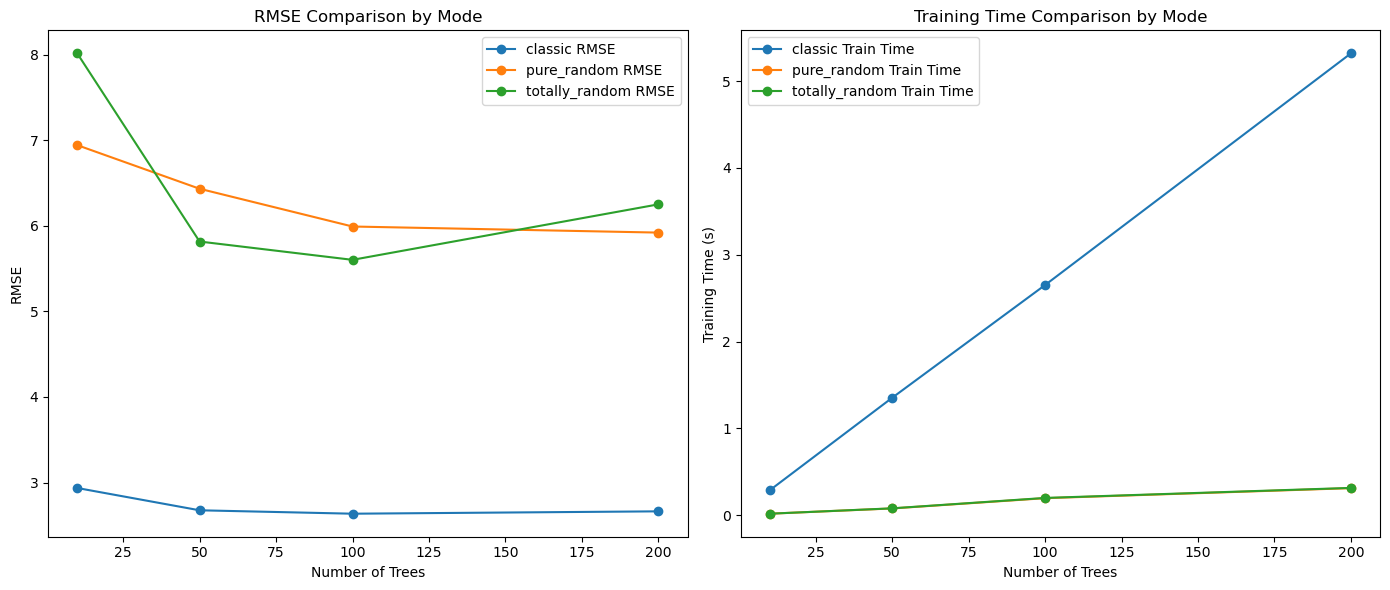

In [6]:
# Synthetic dataset generation
np.random.seed(42)
n_samples = 100
n_features = 5

# Strong linear relationships in some features
X = np.random.uniform(-10, 10, (n_samples, n_features))
y = (
    2 * X[:, 0]  # Strong linear relationship with first feature
    + 3 * np.sin(X[:, 1])  # Nonlinear relationship with second feature
    + np.random.normal(0, 1, n_samples)  # Noise
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modes and parameters to compare
modes = ['classic', 'pure_random', 'totally_random']
n_trees_values = [10, 50, 100, 200]
max_depth_values = [10]
results = []

# Evaluate each mode
for mode in modes:
    for n_trees in n_trees_values:
        for max_depth in max_depth_values:

            print(f"\n--- Evaluating Mode: {mode}, Trees: {n_trees}, Depth: {max_depth} ---")
            
            # Initialize and train model
            custom_model = CustomRF(
                n_trees=n_trees,
                max_depth=max_depth,
                forest_mode=mode
            )
            start_time = time.time()
            custom_model.fit(X_train, y_train)
            train_time = time.time() - start_time

            # Predict 
            y_pred = custom_model.predict(X_test)

            # Compute accuracy metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            nrmse = rmse / (y_test.max() - y_test.min())

            # Store results
            results.append({
                'Mode': mode,
                'Trees': n_trees,
                'Max Depth': max_depth,
                'Train Time (s)': train_time,
                'RMSE': rmse,
                'NRMSE': nrmse
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\n--- Results ---")
print(results_df)

# Visualization
plt.figure(figsize=(14, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
for mode in modes:
    mode_results = results_df[results_df['Mode'] == mode]
    plt.plot(
        mode_results['Trees'],
        mode_results['RMSE'],
        marker='o',
        label=f"{mode} RMSE"
    )
plt.title("RMSE Comparison by Mode")
plt.xlabel("Number of Trees")
plt.ylabel("RMSE")
plt.legend()

# Training Time comparison
plt.subplot(1, 2, 2)
for mode in modes:
    mode_results = results_df[results_df['Mode'] == mode]
    plt.plot(
        mode_results['Trees'],
        mode_results['Train Time (s)'],
        marker='o',
        label=f"{mode} Train Time"
    )
plt.title("Training Time Comparison by Mode")
plt.xlabel("Number of Trees")
plt.ylabel("Training Time (s)")
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Synthetic dataset generation with known feature importance
np.random.seed(42)
n_samples = 300
n_features = 5

# Define true contributions for each feature
true_importances = [0.4, 0.3, 0.2, 0.1, 0.0]  # Feature 0 > Feature 1 > Feature 2 > Feature 3 > Feature 4

# Generate features and target with controlled importance
X = np.random.uniform(-10, 10, (n_samples, n_features))
y = (
    true_importances[0] * X[:, 0] +  # Feature 0 contributes 40%
    true_importances[1] * X[:, 1] +  # Feature 1 contributes 30%
    true_importances[2] * X[:, 2] +  # Feature 2 contributes 20%
    true_importances[3] * X[:, 3] +  # Feature 3 contributes 10%
    np.random.normal(0, 1, n_samples)  # Add noise
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom RandomForestRegressor (your implementation)
custom_model = CustomRF(n_trees=100, max_depth=10, forest_mode="classic")
custom_model.fit(X_train, y_train)

# Compute feature importances for custom model
mdi_importances_custom = custom_model.feature_importances_mdi()
mda_importances_custom = custom_model.feature_importances_mda(n_repeats=10, random_state=42)

# scikit-learn RandomForestRegressor
sklearn_model = SklearnRF(n_estimators=100, max_depth=10, random_state=42)
sklearn_model.fit(X_train, y_train)

# Compute scikit-learn feature importances
mdi_importances_sklearn = sklearn_model.feature_importances_
perm_importances = permutation_importance(
    sklearn_model, X_test, y_test, n_repeats=10, random_state=42
)
mda_importances_sklearn = perm_importances.importances_mean

# Display results
print("\n--- True Feature Importances ---")
for feat, imp in enumerate(true_importances):
    print(f"Feature {feat}: {imp:.4f}")

print("\n--- MDI Feature Importances ---")
print("Custom RandomForest:")
for feat, imp in sorted(mdi_importances_custom.items()):
    print(f"Feature {feat}: {imp:.4f}")

print("\nscikit-learn RandomForest:")
for feat, imp in enumerate(mdi_importances_sklearn):
    print(f"Feature {feat}: {imp:.4f}")

print("\n--- MDA Feature Importances ---")
print("Custom RandomForest:")
for feat, imp in sorted(mda_importances_custom.items()):
    print(f"Feature {feat}: {imp:.4f}")

print("\nscikit-learn RandomForest:")
for feat, imp in enumerate(mda_importances_sklearn):
    print(f"Feature {feat}: {imp:.4f}")


Initializing RandomForestRegressor with forest_mode=classic

--- True Feature Importances ---
Feature 0: 0.4000
Feature 1: 0.3000
Feature 2: 0.2000
Feature 3: 0.1000
Feature 4: 0.0000

--- MDI Feature Importances ---
Custom RandomForest:
Feature 0: 1.0000

scikit-learn RandomForest:
Feature 0: 0.5338
Feature 1: 0.2740
Feature 2: 0.1084
Feature 3: 0.0527
Feature 4: 0.0312

--- MDA Feature Importances ---
Custom RandomForest:
Feature 0: 10.2141
Feature 1: 5.4238
Feature 2: 1.4066
Feature 3: 0.5184
Feature 4: 0.0858

scikit-learn RandomForest:
Feature 0: 1.0659
Feature 1: 0.6042
Feature 2: 0.1734
Feature 3: 0.0552
Feature 4: -0.0138


Next steps: confirm theoretical results with centered, uniform, and PURF implementations

Directions for future work: implement additional variants: Feature-Weighted, Quantile, Online, etc. 